In [1]:
from pv_analysis import *
from shadow_matrix_re import *
from visual_utils import *
import pandas as pd
import numpy as np
import tqdm

Loading shadow matrix...
Calculating seasonal sun paths...


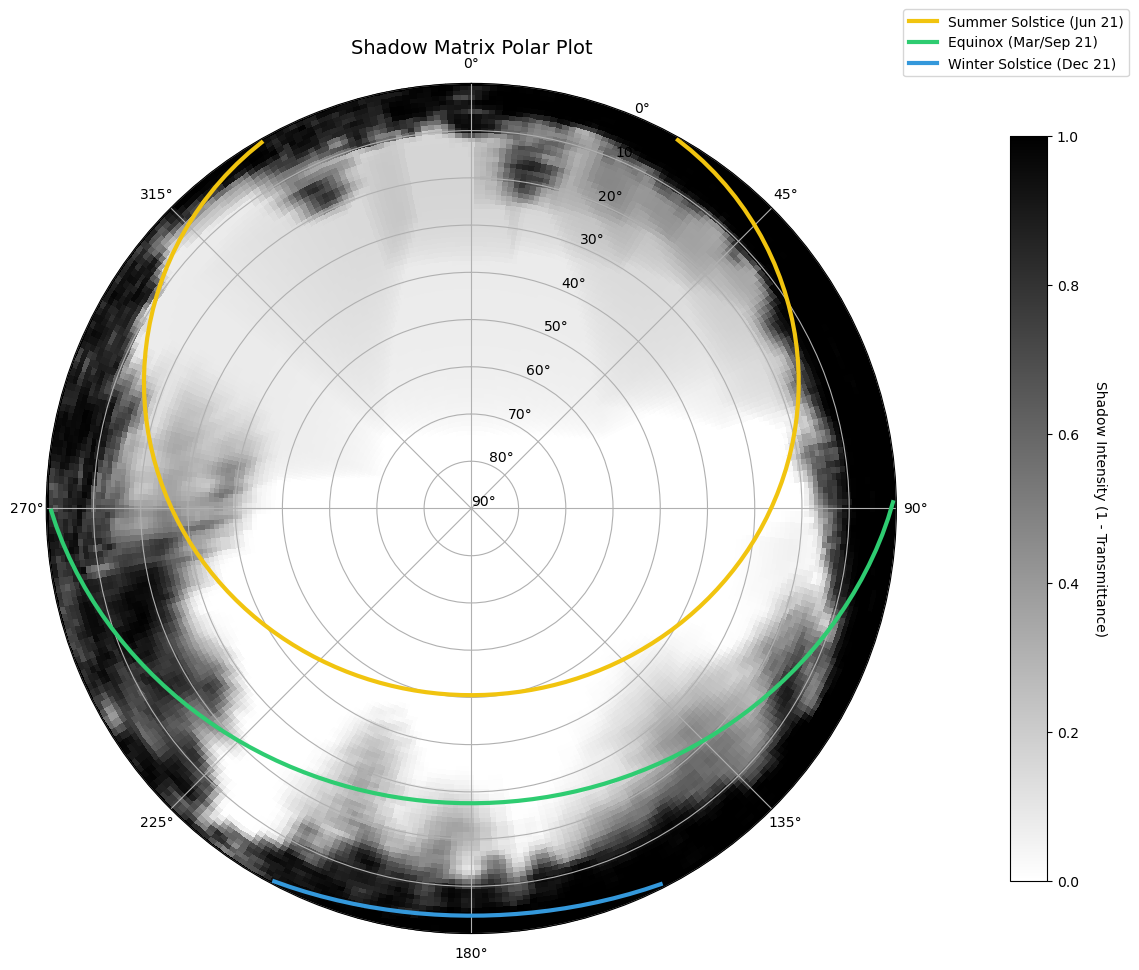

In [2]:
MATRIX_PATH = 'results/shadow_matrix_results_SE_pro/shadow_attenuation_matrix_conecasting_SE_v1.csv'
plot_shadow_matrix_with_sunpaths(matrix_path=MATRIX_PATH, fill_missing=False)

Loaded data/pvdata/pv_21.xlsx: 102,263 records
  Range: 2021-01-01 00:00:00 → 2021-12-31 23:55:00

  TIMESTAMP GAP ANALYSIS: data/pvdata/pv_21.xlsx
  Total records:      102,263
  First:              2021-01-01 00:00:00
  Last:               2021-12-31 23:55:00
  Span:               364 days
  Expected interval:  5 min

--- INTERVAL CLASSIFICATION ---
  Normal (5 min):     102,235  (99.97%)
  Exactly 1-hour gap:       0
  Gaps > 1 hour:           27
  Other irregular:          0
  Duplicates (0 min):       0
  Backwards jumps:          0

--- GAPS > 1 HOUR ---
  2021-11-18 15:40:00  →  2021-11-19 07:45:00  (965 min = 16.1 h)
  2021-11-11 16:05:00  →  2021-11-12 07:30:00  (925 min = 15.4 h)
  2021-11-04 16:15:00  →  2021-11-05 07:20:00  (905 min = 15.1 h)
  2021-10-28 17:25:00  →  2021-10-29 08:00:00  (875 min = 14.6 h)
  2021-10-21 18:00:00  →  2021-10-22 07:45:00  (825 min = 13.8 h)
  2021-10-14 18:20:00  →  2021-10-15 07:10:00  (770 min = 12.8 h)
  2021-10-07 18:35:00  →  2021-10-08 

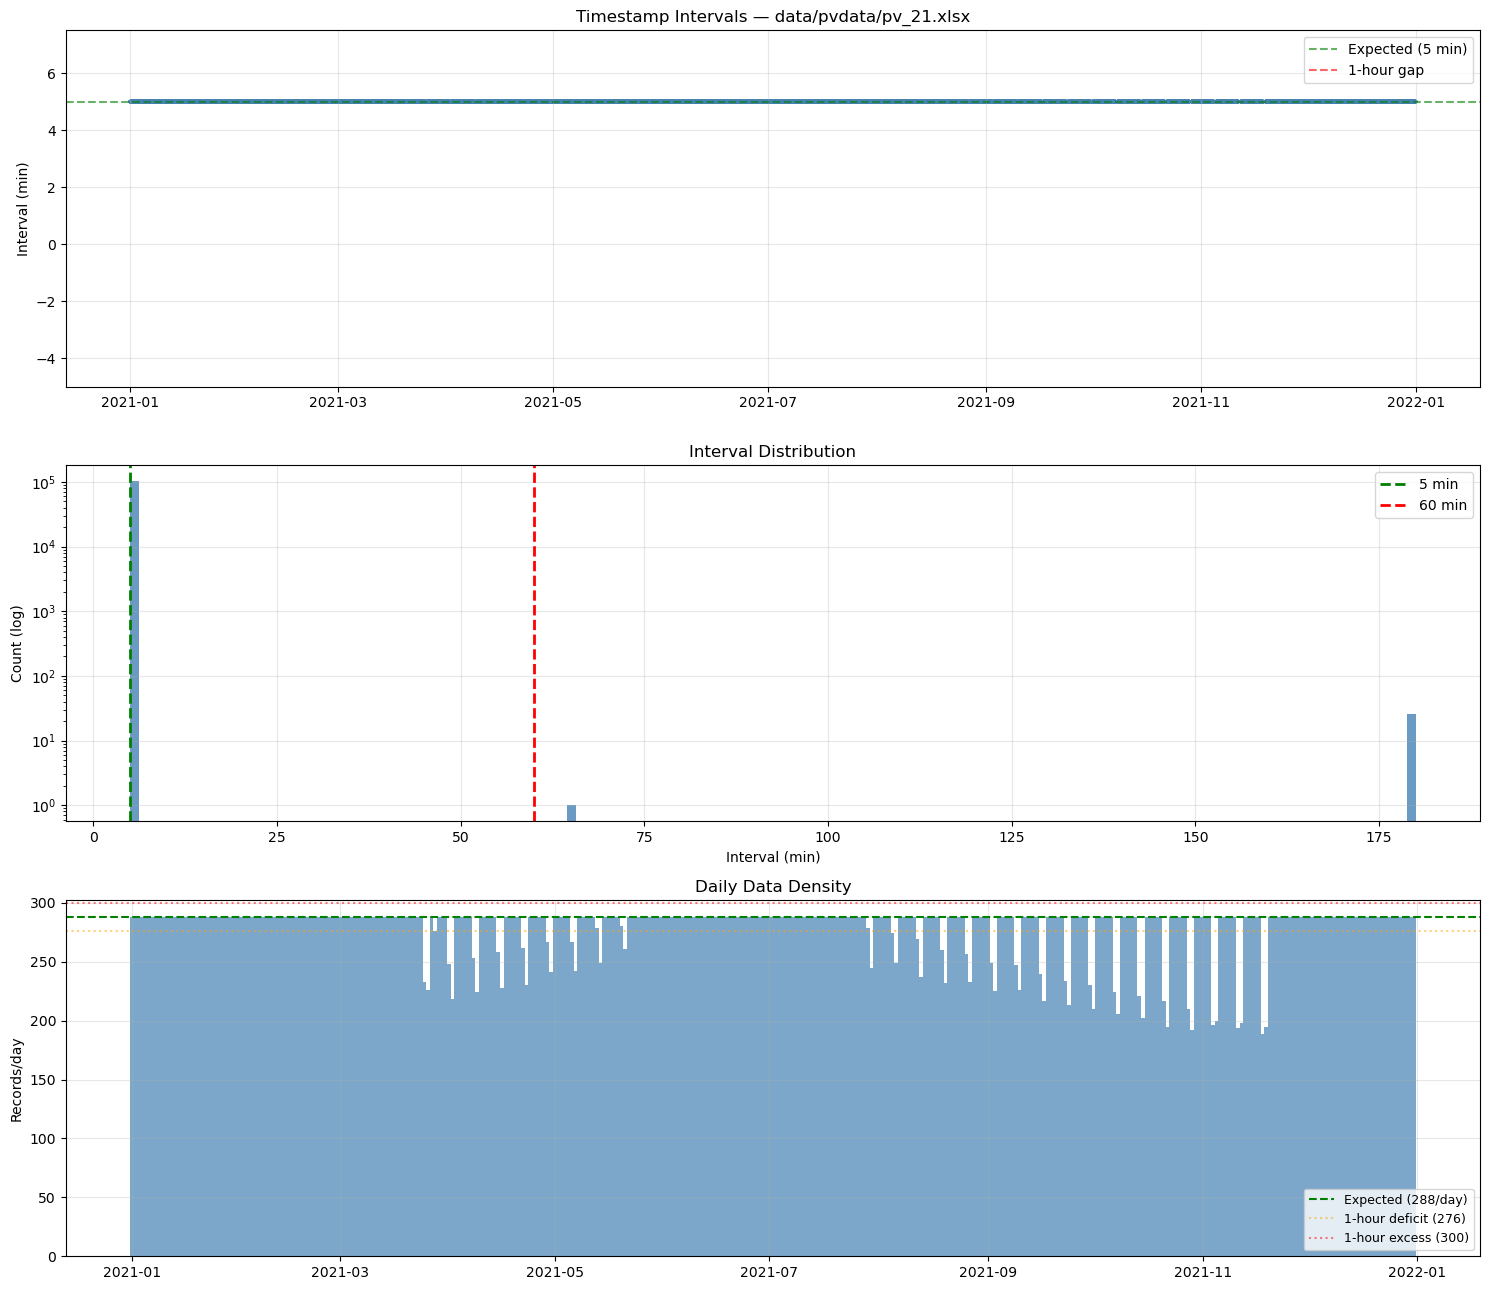

In [3]:
from investigate_timezone import analyze_timestamps
report = analyze_timestamps("data/pvdata/pv_21.xlsx")

Using energy column: 'Energia | Symo 8.2-3-M (1)'
Site: 62.9798°N, 27.6486°E
Power threshold: 0.05 Wh

  UTC OFFSET DETECTION RESULTS
  Days analyzed: 247
  Days with production: 247

--- OFFSET DISTRIBUTION (onset - sunrise_UTC, rounded to hours) ---
  UTC+1:    1 days (  0.4%)  
  UTC+2:   34 days ( 13.8%)  ██████
  UTC+3:  197 days ( 79.8%)  ███████████████████████████████████████
  UTC+4:    9 days (  3.6%)  █
  UTC+5:    3 days (  1.2%)  
  UTC+8:    3 days (  1.2%)  

--- CONCLUSION ---
  Most frequent offset bin: UTC+3
  Median raw offset: 2.75 hours
  Implied startup delay: ~-15 min after sunrise

  ✓ Logger timezone: UTC+3 (EEST — Eastern European Summer Time)
    Or possibly Turkey Time (TRT) / Moscow Time (MSK).

--- SEASONAL CHECK ---
  Winter months median offset: 3 h
  Summer months median offset: 3 h
  ✓ No seasonal shift — confirms FIXED UTC+3

Saved diagnostic plots to utc_offset_analysis.png


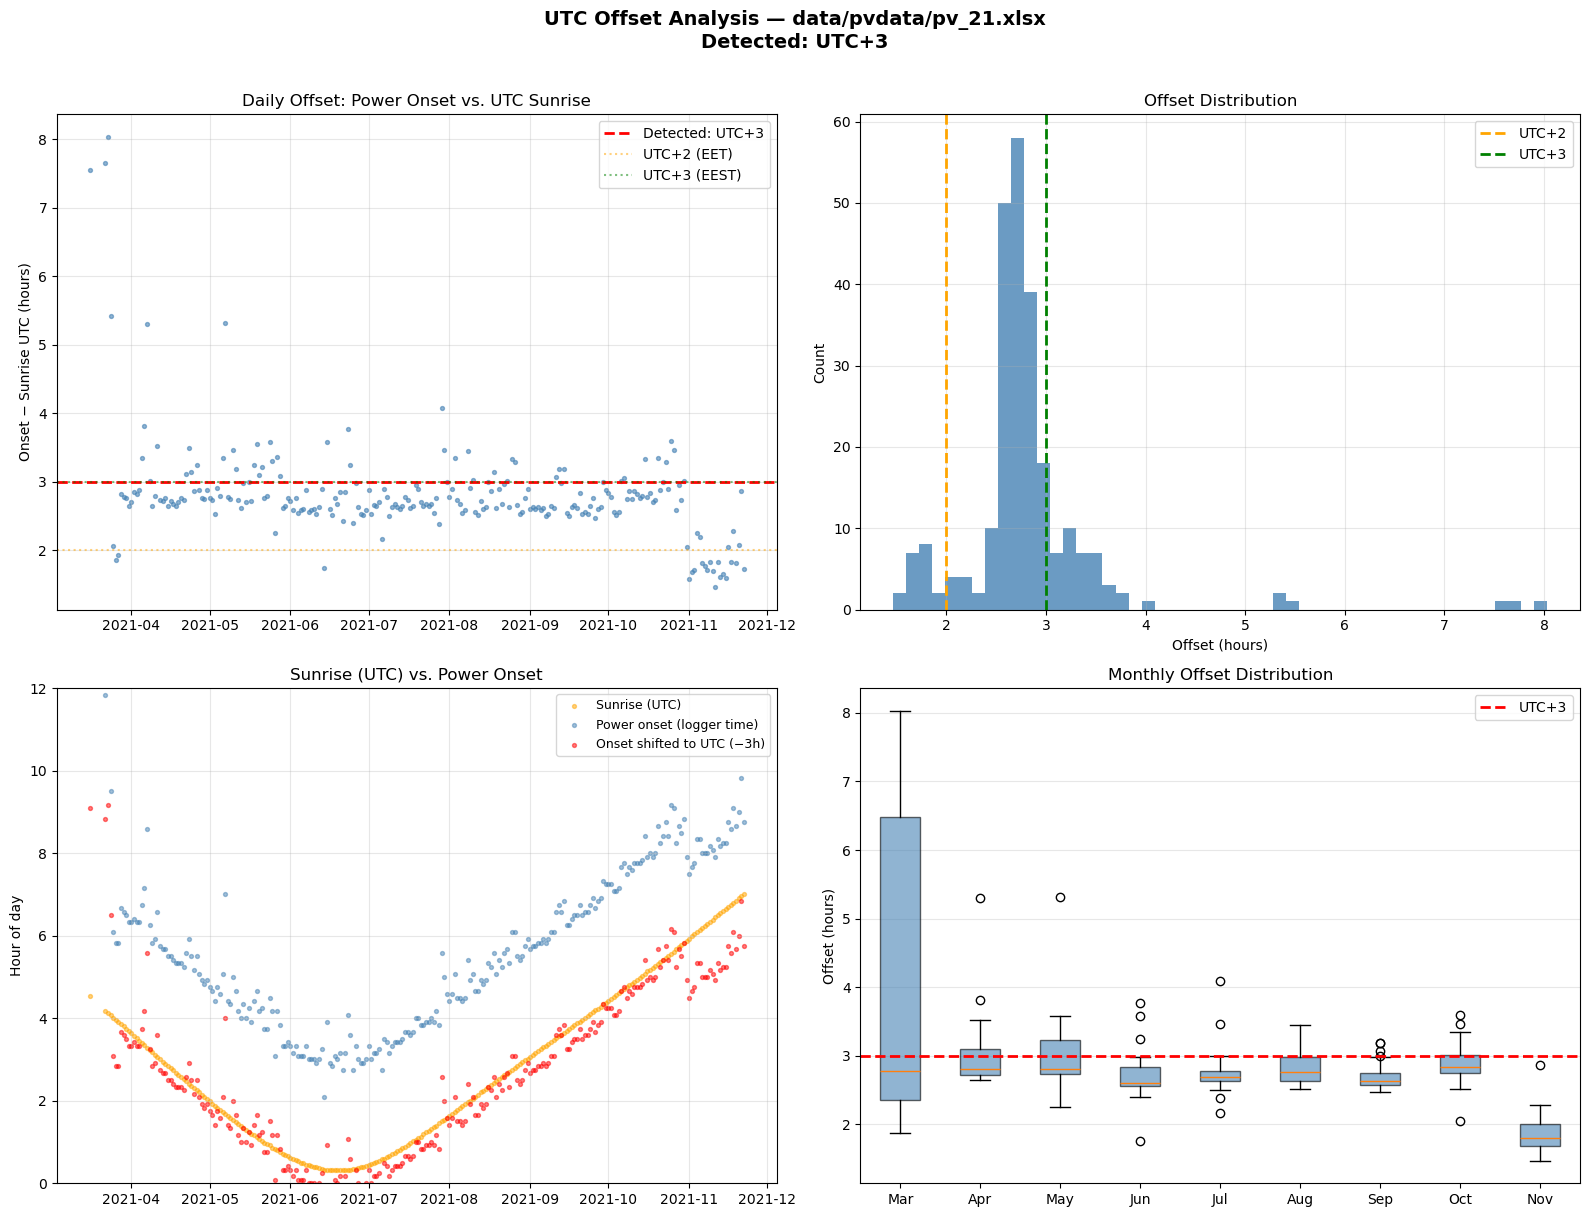

Detected offset: UTC+3


In [1]:
from detect_utc_offset import detect_utc_offset
result = detect_utc_offset("data/pvdata/pv_21.xlsx")
print(f"Detected offset: UTC+{result['offset']}")